# Problem Set 4


## Question 1

As in [Applied Linear Algebra](https://datascience.quantecon.org/../scientific/applied_linalg.html):

Consider an economy where in any given year, $ \alpha = 4\% $ of current employed workers lose their jobs and
$ \phi = 15\% $ of unemployed workers find jobs.

Define the vector $ x_0 = \begin{bmatrix} 650,000 & 150,000 \end{bmatrix} $ as the number of
employed and unemployed workers (respectively) at time $ 0 $ in the economy.

Adapting the code from the lecture notes, plot the unemployment rate over time in this economy for $ t = 0, \ldots 20 $ (i.e. number of employed over the total number of workers).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

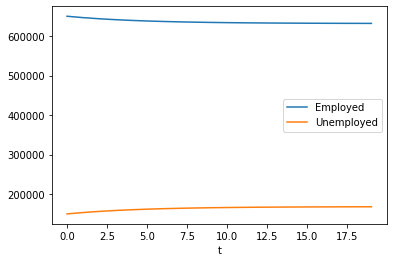

In [2]:
alpha=0.04
phi=0.15
T=20
x0=np.array([650000,150000])
A=np.array([[1-alpha,alpha],
            [phi,1-phi]])

def simulate(x0,A,T=20):
    """
    Simulate the dynamics of unemployment for T periods starting from x0
    and using values of A for probabilities of moving between employment
    and unemployment
    """
    nX=x0.shape[0]
    out=np.zeros((T,nX))
    out[0,:]=x0
    for t in range(1,T):
        out[t,:]=A.T@out[t-1,:]
    return out

In [ ]:
def plot_simulation(x0, A, T=20):
    fig, ax=plt.subplots()
    X=simulate(x0, A, T) 
    ax.plot(X[:, 0])
    ax.plot(X[:, 1])
    ax.set_xlabel("t")
    ax.legend(["Employed", "Unemployed"])
    return ax

X_20 = plot_simulation(x0, A, T=20)

Continue the simulation for 1000 periods to find a long-run unemployment rate (when it converges).

long run employed worker is 631578.9473684176,long run unemployed worker is 168421.0526315779
AxesSubplot(0.125,0.125;0.775x0.755)


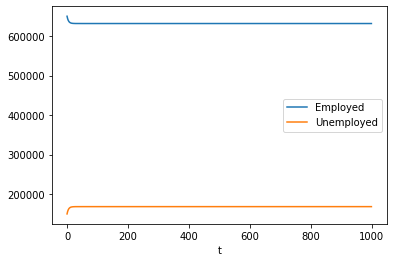

In [3]:
# your code here
rate_1000=simulate(x0,A,T=1000)[999,:]
X_1000 = plot_simulation(x0, A, T = 1000)
print(f"long run employed worker is {rate_1000[0]},long run unemployed worker is {rate_1000[1]}")
print(X_1000)

## Question 2

Wikipedia and other credible statistics sources tell us that the mean and
variance of the Uniform(0, 1) distribution are (1/2, 1/12) respectively.

How could we check whether the Numpy random numbers approximate these
values? (*hint*: some functions in [Introduction to Numpy](https://datascience.quantecon.org/../scientific/numpy_arrays.html) and [Randomness](https://datascience.quantecon.org/../scientific/randomness.html) might be useful)

Please only use the functions in the Numpy package (i.e., don't use `scipy.stats`) to answer this question.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ae25e5250>,
      dtype=object)

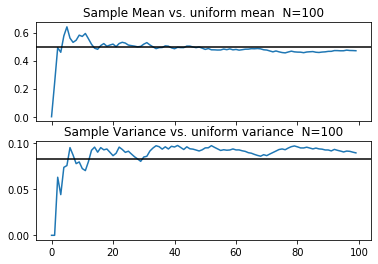

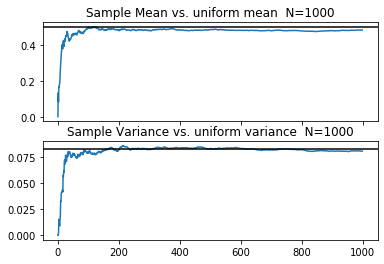

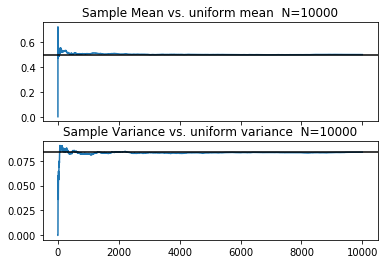

In [4]:
# your code here
import numpy as np

def sample_mean_var_plots(N):
    '''
    Draw sample size N from uniform[0, 1] random variables, 
    plot the sample_mean and sample_variance,
    and compair with the mean and variance of the Uniform(0, 1) distribution: (1/2, 1/12) 
    '''
    #set initial value for sample mean and variance
    sample_mean = np.zeros(N)
    sample_var = np.zeros(N)
    sample = np.random.rand(N-1) #np.random.uniform(0,1,1000) 
    
    #compute sample mean and variance through N random variables 
    for i in range(1,N):
        sample_mean[i] = sample[0:i].mean()
        sample_var[i] = sample[0:i].var()
        
    #plot mean and variance in same x-axis
    fig, ax = plt.subplots(2,sharex=True)
    ax[0].set_title(f"Sample Mean vs. uniform mean  N={N}")
    ax[0].plot(sample_mean)
    ax[0].axhline(1/2, color = 'black')
    
    ax[1].set_title(f"Sample Variance vs. uniform variance  N={N}")
    ax[1].plot(sample_var)
    ax[1].axhline(1/12, color = 'black')
    return ax

sample_mean_var_plots(100)
sample_mean_var_plots(1000)
sample_mean_var_plots(10000)

I increased sample size N from from 100 to 1000 to 10000 and the result shows that:
- sample_mean and sample_variance converge to (1/2, 1/12) as sample size increase
- it means that we can use uniform random variables to approximates the mean and variance of the Uniform(0, 1) distribution, the larger the sample size, the more accurate our estimates
- the result is consistent with the Law of Large Numbers

## Question 3

Assume you have been given the opportunity to choose between one of three financial assets.

You will be given the asset for free, allowed to hold it indefinitely, and will keep all payoffs.

Also assume the assets’ payoffs are distributed as follows (the notations are the same as in “Continuous Distributions” subsection of [Randomness](https://datascience.quantecon.org/../scientific/randomness.html)):

1. Normal with $ \mu = 10, \sigma = 5 $  
1. Gamma with $ k = 5.3, \theta = 2 $  
1. Gamma with $ k = 5, \theta = 2 $  


Use `scipy.stats` to answer the following questions:

- Which asset has the highest average returns?  
- Which asset has the highest median returns?  
- Which asset has the lowest coefficient of variation, i.e., standard deviation divided by mean?  
- Which asset would you choose? Why? (There is not a single right answer here. Just be creative and express your preferences.)  


You can find the official documentation of `scipy.stats` [here](https://docs.scipy.org/doc/scipy/reference/stats.html)

asset 1 has an average return 10.0
asset 2 has an average return 7.3
asset 3 has an average return 7.0
asset 1 has highest average return return 10.0
asset 1 has median return 10.0
asset 2 has median return 6.9706531290482685
asset 3 has median return 6.670908882795985
asset 1 has highest median return return 10.0
asset 1 has coefficient of variation return 0.5
asset 2 has coefficient of variation return 0.3153661488553791
asset 3 has coefficient of variation return 0.31943828249996997
asset 2 has lowest median return return 0.3153661488553791


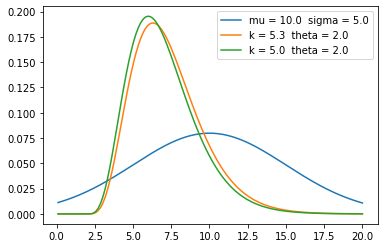

In [5]:
# your code here
import scipy.stats as st
def plot_gamma(k, theta, x, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    pdf_x = st.gamma(k, theta).pdf(x)
    ax.plot(x, pdf_x, label=f"k = {k}  theta = {theta}")
    return ax

def plot_normal(mu,sigma,x,ax=None):
    if ax is None:
        _, ax = plt.subplots()
    pdf_x = st.norm(mu, sigma).pdf(x)
    ax.plot(x, pdf_x, label=f"mu = {mu}  sigma = {sigma}")
    return ax

#plot the pdf of three assets
fig, ax = plt.subplots()
x = np.linspace(0.1, 20, 130)
plot_normal(10.0, 5.0, x, ax)
plot_gamma(5.3, 2.0, x, ax)
plot_gamma(5.0, 2.0, x, ax)
ax.legend()

#define three assets and compute their average, median, and coefficient of variation
asset_1 = st.norm(10, 5)
asset_2 = st.gamma(5.3, 2)
asset_3 = st.gamma(5, 2)
asset_list = list([asset_1, asset_2, asset_3])
avg_return_list = [asset.mean() for asset in asset_list]
median_return_list = [asset.median() for asset in asset_list]
cv_list = [asset.std()/asset.mean() for asset in asset_list]


#highest average returns
max_avg = avg_return_list[0]
max_index = 0
for i, asset_avg in enumerate(avg_return_list):
    print(f"asset {i + 1} has an average return {asset_avg}")
    if asset_avg > max_avg:
        max_avg = asset_avg 
        max_index = i
print(f"asset {max_index + 1} has highest average return return {max_avg}")


#highest median returns
max_median = median_return_list[0]
max_index = 0
for i, asset_median in enumerate(median_return_list):
    print(f"asset {i + 1} has median return {asset_median}")
    if asset_median > max_median:
        max_median = asset_median 
        max_index = i
print(f"asset {max_index + 1} has highest median return return {max_median}")

    
#lowest coefficient of variation, i.e., standard deviation divided by mean
min_cv = cv_list[0]
min_index = 0
for i, asset_cv in enumerate(cv_list):
    print(f"asset {i + 1} has coefficient of variation return {asset_cv}")
    if asset_cv < min_cv:
        min_cv = asset_cv
        min_index = i
print(f"asset {min_index + 1} has lowest median return return {min_cv}")
    

1. The first asset has the highest average returns.
2. The first asset has the highest median returns.
3. The second asset has the lowest coefficient of variation.
4. As a person with relatively high risk aversion, I will avoid the first asset as its volatility is too high. I will choose the second asset because it has the second-highest return and the lowest coefficient of variation. It means that its volatilty is relatively small while maintainng an above-average return.

## Question 4

Take the example with preferences over bananas (B) and apples (A) in [Optimization](https://datascience.quantecon.org/../scientific/optimization.html)

The consumer solves the following problem:

$$
\begin{aligned}
\max_{A, B} & B^{\alpha}A^{1-\alpha}\\
\text{s.t. } & p_A A + B \leq W
\end{aligned}
$$

Fix $ p_A = 2 $ and $ \alpha = 0.3 $.  Make a grid of `W` between `1` and `3` and then plot the optimal ratio of B to A.

The optimal ratio is 0.8571419471863111
and was found at (A,B)= (1.050000334409137, 0.8999993311817256)


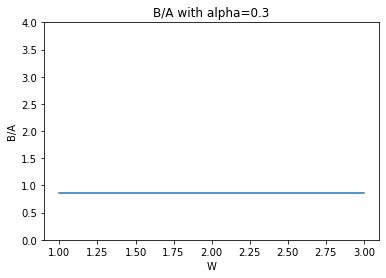

In [6]:
# Your code here
import scipy.optimize as opt
from scipy.optimize import minimize_scalar

alpha = .3
pa = 2.0
Ws = np.linspace(1, 3, 20)
BA_ratios = []

def U(A, B, alpha = .3):
    return B**alpha * A**(1-alpha)

def A_bc(B, W = 20, pa = 2):
    """
    Given B, W, and pa return the max amount of A our consumer can afford
    """
    return (W - B) / pa

def objective(B, W = 20, pa = 2, alpha = .3):
    """
    Return value of -U for a given B, when we consume as much A as possible
    """
    A = A_bc(B, W, pa)
    return -U(A, B, alpha)

for W in Ws:
    result = minimize_scalar(objective, args=(W, pa, alpha), bounds=[0,W], method='bounded')
    opt_B = result.x
    opt_A = A_bc(opt_B, W, pa)
    BA_ratios.append(opt_B/opt_A)
  
fig, ax = plt.subplots()
ax.plot(Ws, BA_ratios)
ax.set_ylim((0,4))
ax.set_xlabel('W')
ax.set_ylabel('B/A')
ax.set_title(f'B/A with alpha={alpha}')
print("The optimal ratio is",opt_B/opt_A)
print("and was found at (A,B)=",(opt_A, opt_B))

Do the same graph for $ \alpha = 0.5 $ **and compare/interpret.**

The optimal ratio is 1.9999999999999993
and was found at (A,B)= (0.7500000000000001, 1.4999999999999998)


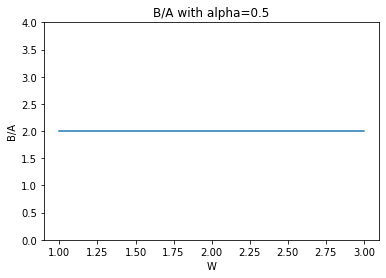

In [7]:
alpha = 0.5
BA_ratios = []
for W in Ws:
    result = minimize_scalar(objective, args=(W, pa, alpha), bounds=[0,W], method='bounded')
    opt_B = result.x
    opt_A = A_bc(opt_B, W, pa)
    BA_ratios.append(opt_B/opt_A)

   
fig, ax = plt.subplots()
ax.plot(Ws, BA_ratios)
ax.set_ylim((0,4))
ax.set_xlabel('W')
ax.set_ylabel('B/A')
ax.set_title(f'B/A with alpha={alpha}')
print("The optimal ratio is",opt_B/opt_A)
print("and was found at (A,B)=",(opt_A, opt_B))

Compare and interpret:
- When $\alpha = 0.3$, $B/A = 0.857$ and when $\alpha=0.5$, $B/A=2$. In both cases, B/A remains constant at each level of W.
- So $B/A$ depend only on $\alpha$ and $p_A/p_B$ but does not depend on $W$.